# Star Wars Survey

While waiting for Star Wars: The Force Awakens to come out, the team at FiveThirtyEight became interested in answering some questions about Star Wars fans. In particular, they wondered: **does the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch?**

The team needed to collect data addressing this question. To do this, they surveyed Star Wars fans using the online tool SurveyMonkey. They received 835 total responses, which you download from their [GitHub repository].

For this project, we will focus on cleaning and analysing data related to this subject.

The data has several columns, including:

`RespondentID` - An anonymized ID for the respondent (person taking the survey)

`Gender` - The respondent's gender

`Age` - The respondent's age

`Household Income` - The respondent's income

`Education` - The respondent's education level

`Location (Census Region)` - The respondent's location

`Have you seen any of the 6 films in the Star Wars franchise?` - Has a Yes or No response

`Do you consider yourself to be a fan of the Star Wars film franchise?` - Has a Yes or No response

There are several other columns containing answers to questions about the Star Wars movies. For some questions, the respondent had to check one or more boxes. This type of data is difficult to represent in columnar format. As a result, this data set needs a lot of cleaning.

Let's start by importing the libraries. In this project we will use *pandas* and *numpy* for data handling, *matplotlib* and *seaborn* for data visualization and *re* for any regular expressions that we might use during data cleaning.

In [1]:
# Read in data, import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Read in the dataset and assign it to star_wars
star_wars = pd.read_csv('star_wars.csv', encoding='ISO-8859-1')

# Display first few rows of the dataset
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


#### Initial look

From looking at the output above, one can see that the dataset consists of 38 columns and that already we can see that some columns will have to be data cleaned such as `Unnamed: 4`. Also, some columns include the values 'Yes' or 'No' which can be easily converted to Boolean type `True` or `False`.

Let's have a look at each and every column name in the dataset.

In [2]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

## Part 1 - Data Cleaning

It is clear that some questions in the survey consisted of a kind of a radio/tick button as there are questions followed by a range of columns labelled in the format 'Unnamed: x', *x* referring to the number. These data will have to be cleaned.

Furthermore, `RespondentID` should be unique for each row, but there are some values which have NaN as a value. Let's start by dropping these rows altogether.

There also rows that contain 'No' in the column of whether they have watched any Star Wars movie and obviously, for the basis of this project, these answers are not helpful.

Let's start by dropping the rows which have a `NaN` value in the `RespondentID` column.

In [3]:
# Dropping NaN rows in RespondentID
# Select the RespondentID Column and apply the .notnull() function
star_wars = star_wars[pd.notnull(star_wars['RespondentID'])]
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


Let's now move on and convert the above data in the 2nd and 3rd column to Boolean type - `True` or `False`. This will make it easier to use and analyse the data.

In [4]:
# replace values with True and False
yes_no = {"Yes": True,"No": False}

# Select column values to replace to boolean
col_to_boolean = ['Have you seen any of the 6 films in the Star Wars franchise?', 'Do you consider yourself to be a fan of the Star Wars film franchise?']

# iterate through the list and apply the map function
for c in col_to_boolean:
    star_wars[c] = star_wars[c].map(yes_no)

# Both columns should now only show True or False or NaN
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


### 1.1: Data Cleaning - Values for Survey questions

As mentioned above, more columns need cleaning. Let's start with the question where the respondent is asked which of the movies were seen and the respondent had to select the movies, if any. One can acknowledge that the columns `Unnamed: 4`, `Unnamed: 5`, `Unnamed: 6`, `Unnamed: 7`, `Unnamed: 8`; refer to the movies, in order. Since there are 6 movies in all, one can also deduce that the first column in the question, i.e. `Which of the following Star Wars films have you seen? Please select all that apply.` would also refer to the first film in the franchise. Therefore, these will be renamed as `seen_1`, `seen_2` etc... which would imply that the first or second movie in this case were seen.

Let's select the columns to rename, create a dictionary called `film_mapping` which will hold the map values and apply it to the columns.

In [5]:
# Select columns to rename
more_cols_to_rename = ['Which of the following Star Wars films have you seen? Please select all that apply.',
                      'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8']

# Row values contain the names of the movies: let's convert these to Boolean
film_mapping = {
    "Star Wars: Episode I  The Phantom Menace": True,
    np.nan: False,
    "Star Wars: Episode II  Attack of the Clones": True,
    "Star Wars: Episode III  Revenge of the Sith": True,
    "Star Wars: Episode IV  A New Hope": True,
    "Star Wars: Episode V The Empire Strikes Back": True,
    "Star Wars: Episode VI Return of the Jedi": True
}

# Iterate through the list of columns to replace values
for n in more_cols_to_rename:
    star_wars[n] = star_wars[n].map(film_mapping)
    
# Renaming columns:
star_wars = star_wars.rename(columns = {
    "Which of the following Star Wars films have you seen? Please select all that apply.": "seen_1",
    "Unnamed: 4": "seen_2",
    "Unnamed: 5": "seen_3",
    "Unnamed: 6": "seen_4",
    "Unnamed: 7": "seen_5",
    "Unnamed: 8": "seen_6"
})

# Display the new dataset
star_wars.head(5)


,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


The same as above will be performed for the ranking columns. The same principles are used. However, the values were also converted to float type for future use as these values will have to be counted later on when we are to count which film was most seen and which film was ranked highest/lowest.

In [6]:
# Convert values to float type
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

# Renaming the ranking columns
star_wars = star_wars.rename(columns={
    'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.' : "ranking_1",
    "Unnamed: 10": "ranking_2",
    "Unnamed: 11": "ranking_3",
    "Unnamed: 12": "ranking_4",
    "Unnamed: 13": "ranking_5",
    "Unnamed: 14": "ranking_6"
})

#Display the new dataframe
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,ranking_1,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


## Part 2 - Data Analysis and Visualization

### 2.1: Most/Least Favourite Movies

Now that we have data with which we can work, we can start analysing the data and try to come up with some interesting conclusions, based on the data obtained from this survey.

Let's start by using the ranking columns to find the average ranking each movie was given by the respondents.

For this, the ranking columns `ranking_cols` will be selected and the mean will be calculated from each column.

In [7]:
# Select ranking columns
ranking_cols = ['ranking_1', 'ranking_2', 'ranking_3', 'ranking_4', 'ranking_5', 'ranking_6']

# Calculate the mean from each column
ranking_mean = star_wars[ranking_cols].mean()

# Display the mean of each column
ranking_mean

ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64

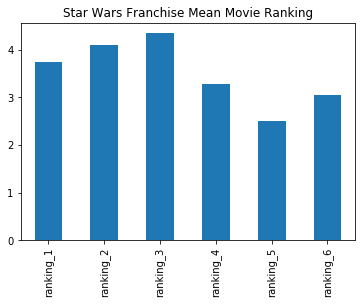

In [8]:
ranking_mean.plot.bar(title='Star Wars Franchise Mean Movie Ranking')

##### Conclusion

In the steps above, we have found out that according to the replies in the survey, the movie that the respondents like the most is movie number 5, i.e. **Star Wars: Episode V The Empire Strikes Back**. Furthermore, the least liked movie is number 3, i.e. **Star Wars: Episode IV  A New Hope**.

### 2.2: Most/Least Seen Movie

In the next step, we will apply the same workflow but instead we will use the 'seen' columns that were cleaned above. Now, we will be able to calculate which movie was seen the most by our respondents.

In [9]:
# Select the seen columns
seen_cols = ['seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6']

# Count the number of 'seen' replies using the .sum() function
seen_sum = star_wars[seen_cols].sum()

# Display numbers according to movies
seen_sum

seen_1    673
seen_2    571
seen_3    550
seen_4    607
seen_5    758
seen_6    738
dtype: int64

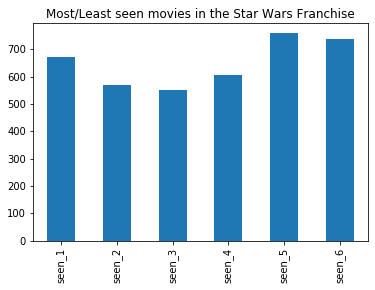

In [10]:
seen_sum.plot.bar(title='Most/Least seen movies in the Star Wars Franchise')

#### Conclusion

Clearly here we can see that Star Wars Ep 5 was the most seen amongst our respondents. The least seen was Ep 3.

### 2.3: Gender vs Seen Count

Next up we will filter the gender columns and check how each gender rated each movie and also which movie they saw the most. 

In [11]:
# males = star_wars[star_wars['Gender'] == 'Male']
# females = star_wars[star_wars['Gender'] == 'Female']

# males_seen_sum = males[seen_cols].sum()
# males_seen_sum

In [12]:
# Create pivot table of location vs seen count
gender_seen_pivot = star_wars.pivot_table(index='Gender', values=seen_cols, aggfunc='sum')

# Display pivot table
gender_seen_pivot

,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6
Gender,,,,,,
Female,298.0,237.0,222.0,255.0,353.0,338.0
Male,361.0,323.0,317.0,342.0,392.0,387.0


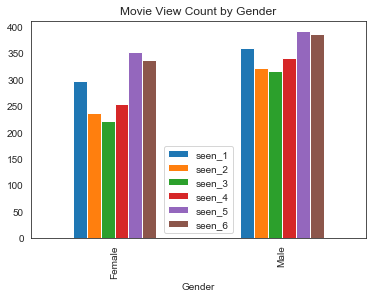

In [13]:
sns.set_style('white')
gender_seen_pivot.plot.bar()
plt.legend(loc='best')
plt.title('Movie View Count by Gender')
plt.show()

In [14]:
gender_ranking_pivot = star_wars.pivot_table(index='Gender', values=ranking_cols, aggfunc='mean')

gender_ranking_pivot

,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6
Gender,,,,,,
Female,3.429293,3.954660,4.418136,3.544081,2.569270,3.078086
Male,4.037825,4.224586,4.274882,2.997636,2.458629,3.002364


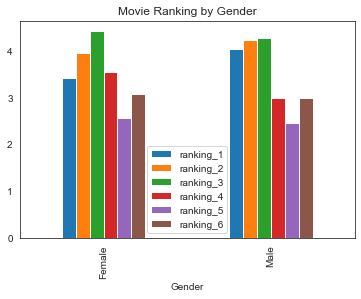

In [15]:
sns.set_style('white')
gender_ranking_pivot.plot.bar()
plt.legend(loc='best')
plt.title('Movie Ranking by Gender')
plt.show()

#### Conclusion

From these 2 results we can obtain some interesting information. 

1) According to our respondents, males have seen the movies much more than their female counterparts, showing that the franchise is probably more popular with males than with females. This could be that traditionally movies having a genre like Star Wars would appeal more with males than females.

2) Star Wars Ep 5 was most seen by both genders. All other movies follow the same pattern in the view count.

3) Both genders ranked Ep 5 and Ep 6 as being considerably better than the other movies.

### 2.4 Movie Ranking according to Education Level

In the next steps, we will see whether the education level attained by our respondents had any bearing on the way they ranked the movies. It will be interesting to see this.

First let's select the `Education` column from the dataframe and count the number of unique values we see in this column.

In [16]:
# Select Education column and count unique values
star_wars['Education'].value_counts()

Some college or Associate degree    328
Bachelor degree                     321
Graduate degree                     275
High school degree                  105
Less than high school degree          7
Name: Education, dtype: int64

From these results we can see that most of the Star Wars survey respondents have a high education level, with at least 89% having at least a College/Associate degree, which happens to be the most common.

To find the ranking of each movie by education level, we will select the columns according to the string type, then calculate the mean of that column. We will then visualise these results using a grouped bar plot to get some conclusions.

For this, a new dataframe `ranking_all_edu` was created which consists only of the rankings for each movie according to education level.

In [17]:
#College/ Associate ranking
college = star_wars[star_wars['Education'] == 'Some college or Associate degree']
college_ranking = college[ranking_cols].mean()

# Bachelor degree
bachelor = star_wars[star_wars['Education'] == 'Bachelor degree']
bachelor_ranking = bachelor[ranking_cols].mean()

# Graduate degree
graduate = star_wars[star_wars['Education'] == 'Graduate degree']
graduate_ranking = graduate[ranking_cols].mean()

# High school ranking
hs = star_wars[star_wars['Education'] == 'High school degree']
hs_ranking = hs[ranking_cols].mean()

# Less than high school
no_hs = star_wars[star_wars['Education'] == 'Less than high school degree']
no_hs_ranking = no_hs[ranking_cols].mean()

#Create new dataframe ranking_all_edu
ranking_all_edu = pd.concat([college_ranking, bachelor_ranking, graduate_ranking, hs_ranking, no_hs_ranking], axis=1)

#Rename the columns in new dataframe
ranking_all_edu = ranking_all_edu.rename(columns={0:'College_Associate_Degree',
                                         1: 'Bachelor_Degree',
                                         2: 'Graduate_Degree',
                                         3: 'High_School_Degree',
                                         4: 'Less than High School Degree'})

#Display the dataframe
ranking_all_edu

,College_Associate_Degree,Bachelor_Degree,Graduate_Degree,High_School_Degree,Less than High School Degree
ranking_1,3.551181,3.828244,3.822222,3.802817,5.000000
ranking_2,3.885827,4.290076,4.225664,3.746479,5.333333
ranking_3,4.102362,4.521073,4.500000,4.126761,3.666667
ranking_4,3.503937,3.114504,3.199115,3.211268,2.666667
ranking_5,2.783465,2.309160,2.323009,2.873239,1.000000
ranking_6,3.173228,2.931298,2.920354,3.239437,3.333333


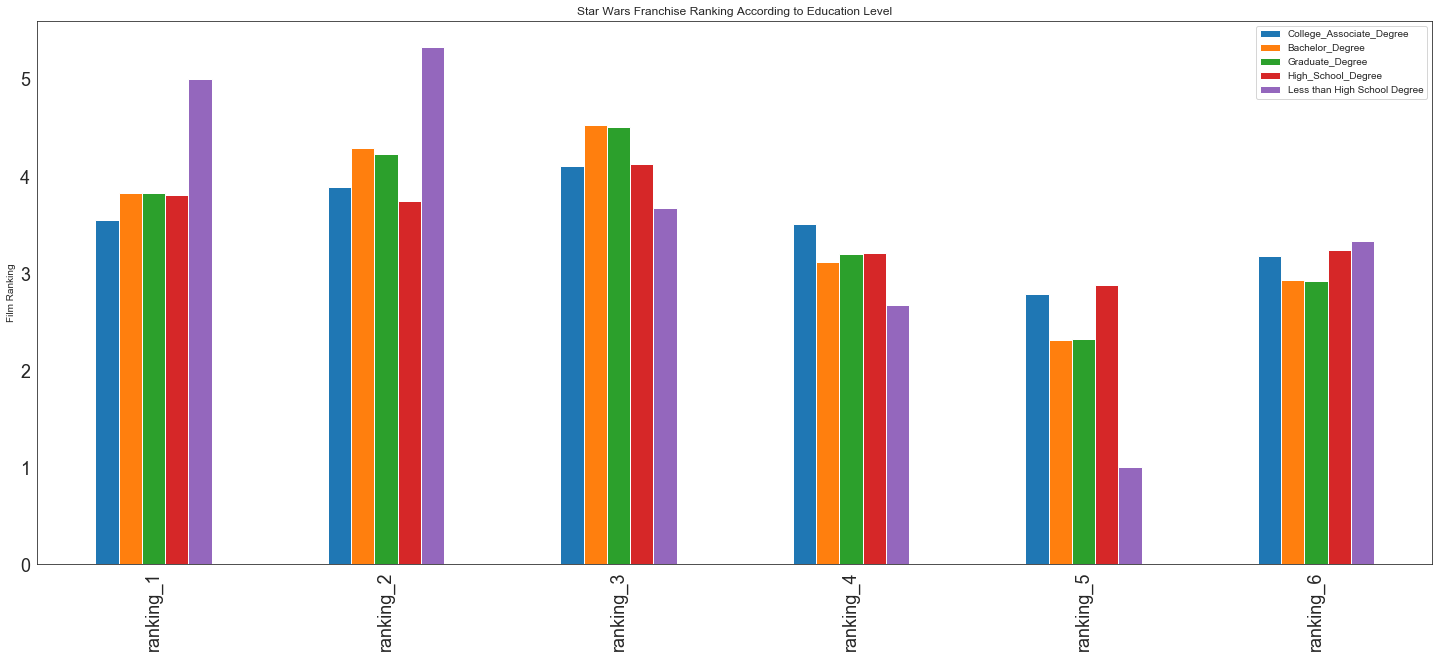

In [18]:
# Plotting of the grouped bar plot

a2 = ranking_all_edu.plot.bar(figsize=(25,10), fontsize=18)
a2.set_ylabel('Film Ranking')
a2.set_title('Star Wars Franchise Ranking According to Education Level')
a2.legend(loc='best')

#### Conclusion

Some interesting results come out of this visualization:

* Respondents with Bachelor and Graduate degrees tend to vote almost identical to each other, across all movies.
* The first two movies were liked more by those with a degree than those which don't have a high school degree.
* Movie nr 5 is liked the most by all respondents with all types of education level.

### 2.5: Movie Ranking according to Age Group

It will be interesting to see how each age group ranked the movies. Were there any movies that were more liked by the younger group, rather than the older group?

For this purpose, we will count the unique values in the `Age` column of the data set and use them to find the mean ranking for each age group.

In [19]:
# Count number of unique values in 'Age' column
star_wars['Age'].value_counts()

45-60    291
> 60     269
30-44    268
18-29    218
Name: Age, dtype: int64

From this result, we can see there are 4 major groups. These will be used to create a new dataframe, `ranking_all`, similar to what we did above for the `Education` column to plot a grouped bar plot. The age groups will be classified as follows:-

* 18-29: `young_adults`
* 30-44: `adults`
* 45-60: `matures`
* 60+: `old`

In [20]:
#Young adults ranking
young_adults = star_wars[star_wars['Age'] == '18-29']
young_adults_ranking = young_adults[ranking_cols].mean()

#adults
adults = star_wars[star_wars['Age'] == '30-44']
adults_ranking = adults[ranking_cols].mean()

#matures
matures = star_wars[star_wars['Age'] == '45-60']
mature_ranking = matures[ranking_cols].mean()

# 60+ ranking
old = star_wars[star_wars['Age'] == '> 60']
old_ranking = old[ranking_cols].mean()

# Create a new dataframe using the results above using the .concat function
ranking_all = pd.concat([young_adults_ranking, adults_ranking, mature_ranking, old_ranking], axis=1)
ranking_all = ranking_all.rename(columns={0:'young_adults_ranking',
                                         1: 'adults_ranking',
                                         2: 'mature_ranking',
                                         3: 'old_ranking'})

# display this dataframe
ranking_all

,young_adults_ranking,adults_ranking,mature_ranking,old_ranking
ranking_1,4.100000,4.347826,3.541667,3.010417
ranking_2,4.100000,4.309179,4.170833,3.761658
ranking_3,3.966667,4.475728,4.537500,4.316062
ranking_4,2.994444,2.932367,3.308333,3.808290
ranking_5,2.722222,2.212560,2.437500,2.730570
ranking_6,3.116667,2.714976,3.004167,3.357513


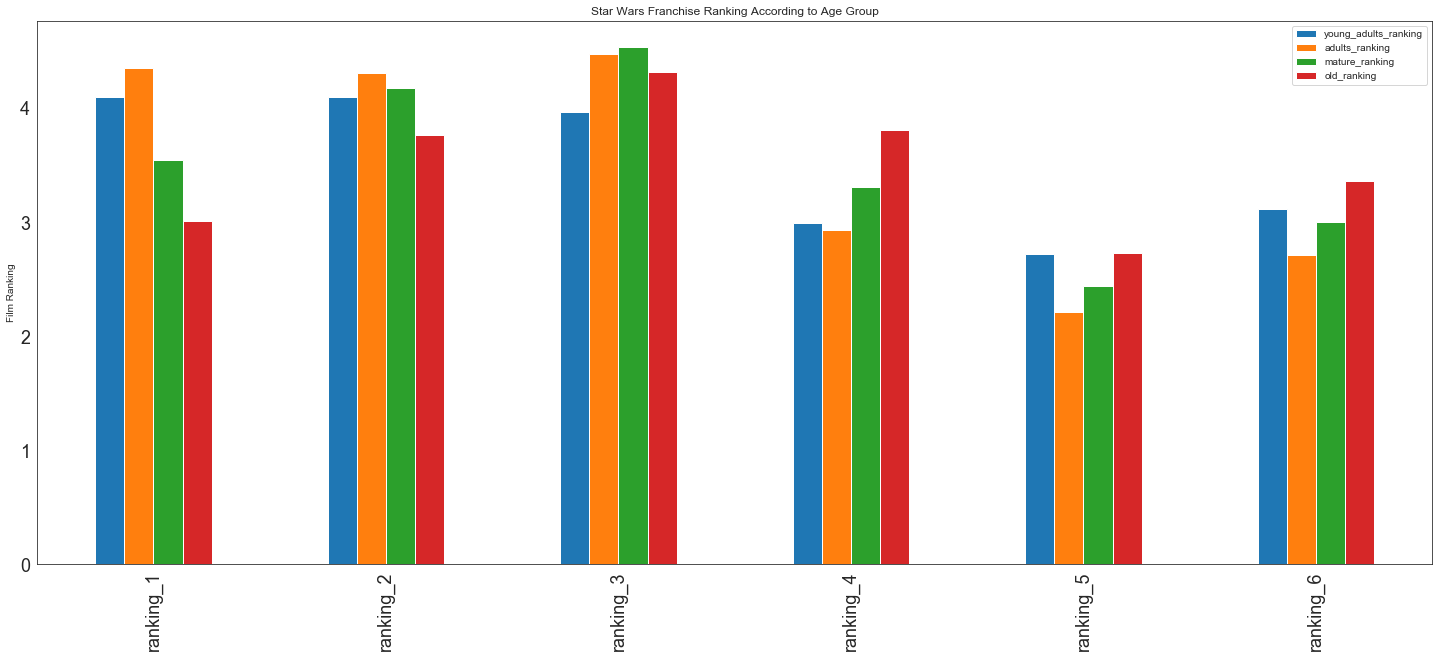

In [21]:
# Create figure a1 to plot a grouped bar plot of Film Ranking according to Age Group
a1 = ranking_all.plot.bar(figsize=(25,10), fontsize=18)
a1.set_ylabel('Film Ranking')
a1.set_title('Star Wars Franchise Ranking According to Age Group')
a1.legend(loc='best')

#### Conclusion

From the results above, we can extract the following conclusions:-

* Movie nr 5 is most liked, again by all age groups.
* Older respondents liked movie 1 better than the other age groups. This is quite possible as nostalgia might come into play.
* The same could be said for the `young_adults` as they tend to prefer by far the most recent movies (4, 5, 6), rather than the older ones (1, 2, 3).

### 2.6: Movie View Count vs Location

It would be interesting to know if you are part of the Star Wars franchise management team where the franchise is most popular, so that one could organise promotional campaigns, where to concentrate advertisements etc.

For this we're going to first check the value counts of the amount of respondents we had from each region. Then, a pivot table will be created with the `Location` vs the `seen_cols` using `sum` as the `aggfunc` to check each region what they saw the most/least etc.

In [22]:
# Rename location column (just for my convenience)
star_wars = star_wars.rename(columns = {'Location (Census Region)' : 'Location'})

# Check unique values
star_wars['Location'].value_counts()

East North Central    181
Pacific               175
South Atlantic        170
Middle Atlantic       122
West South Central    110
West North Central     93
Mountain               79
New England            75
East South Central     38
Name: Location, dtype: int64

In [23]:
# Create pivot table of location vs seen count
location_pivot = star_wars.pivot_table(index='Location', values=seen_cols, aggfunc='sum')

# Display pivot table
location_pivot

,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6
Location,,,,,,
East North Central,102.0,89.0,89.0,95.0,128.0,121.0
East South Central,24.0,21.0,21.0,27.0,31.0,29.0
Middle Atlantic,79.0,69.0,70.0,76.0,83.0,85.0
Mountain,57.0,47.0,46.0,54.0,61.0,59.0
New England,50.0,44.0,43.0,48.0,55.0,54.0
Pacific,120.0,99.0,92.0,105.0,123.0,124.0
South Atlantic,104.0,82.0,79.0,93.0,125.0,120.0
West North Central,61.0,51.0,49.0,49.0,67.0,63.0
West South Central,62.0,58.0,50.0,49.0,70.0,69.0


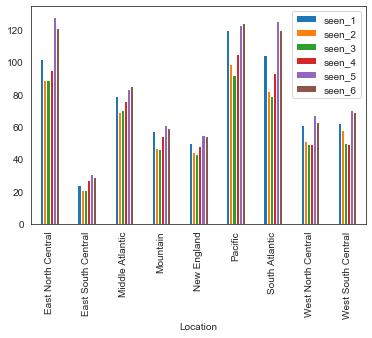

In [24]:
location_bar_plot = sns.set_style('white')
location_pivot.plot.bar()
plt.show()

#### Conclusion

The Star Wars Franchise seems to be most popular in the regions of East North Central, the Pacific and the South Atlantic area. The least interested in the franchise seem to be the East South Central area.

Furthermore, it's also interesting to see that Star Wars V was always in the top 2 most seen for each region out of all the episodes.

### 2.7 Most/Least Favourite Franchise Character

The respondents were also asked who their most/least favourite characters were. The respondents were given options to select ranging from `Very favorably` to `Very unfavorably`. 

Let's display these columns for better understanding.

In [25]:
# Let's start cleaning columns 15-29
# Start by displaying these columns to get an idea what they are

star_wars.iloc[:,15:29].head()

,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28
1,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A)
4,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably
5,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very unfavorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably


All values are in string format. As a result, we cannot count string values so we have to find a way how to convert these to numeric, ready for analysis.

But first, let's check each count for each string for every column so that we get an idea of how the results are.

In [26]:
# Select columns and assign them to star_wars_characters
star_wars_characters = star_wars.iloc[:,15:29]

# Loop through the selection and print the value counts for each string, include NaN
for c in star_wars_characters:
    print(c)
    print('\n')
    print(star_wars_characters[c].value_counts(dropna=False))

Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.


Very favorably                                 610
NaN                                            357
Somewhat favorably                             151
Neither favorably nor unfavorably (neutral)     44
Unfamiliar (N/A)                                15
Somewhat unfavorably                             8
Very unfavorably                                 1
Name: Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her., dtype: int64
Unnamed: 16


Very favorably                                 552
NaN                                            355
Somewhat favorably                             219
Neither favorably nor unfavorably (neutral)     38
Somewhat unfavorably                            13
Unfamiliar (N/A)                                 6
Very unfavorably                                 3
Name: Unnamed: 16, dtype: in

We can now crack on with the data cleaning. Let's rename the columns according to the character list. This is done below.

In [27]:
# character columns renaming
star_wars = star_wars.rename(columns={
    'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.':'Han Solo',
    'Unnamed: 16':'Luke Skywalker',
    'Unnamed: 17':'Princess Leia Organa',
    'Unnamed: 18':'Anakin Skywalker',
    'Unnamed: 19':'Obi Wan Kenobi',
    'Unnamed: 20':'Emperor Palpatine',
    'Unnamed: 21':'Darth Vader',
    'Unnamed: 22':'Lando Calrissian',
    'Unnamed: 23':'Boba Fett',
    'Unnamed: 24':'C-3P0',
    'Unnamed: 25':'R2 D2',
    'Unnamed: 26':'Jar Jar Binks',
    'Unnamed: 27':'Padme Amidala',
    'Unnamed: 28':'Yoda',
})

# Display columns with new character names
star_wars.iloc[:,15:29].head()

,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda
1,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A)
4,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably
5,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very unfavorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably


Now we have all we need to start analysing the data, but first, let's do the same as above again but with the new column names so that then we can compare the final results with the visualization.

In addition, in the next cell we will create a new dataframe called `controversial_character` which will be a copy of the `star_wars_characters` dataframe. This is because this will be used later on when checking for the most controversial character with different data cleaning.

In [28]:
# Let's do the above analysis again , now with proper column names:
star_wars_characters = star_wars.iloc[:,15:29]

# Creation of new dataframes for later use
controversial_character = star_wars_characters.copy()

for c in star_wars_characters:
    print(c)
    print('\n')
    print(star_wars_characters[c].value_counts(dropna=False))
    print('\n')

Han Solo


Very favorably                                 610
NaN                                            357
Somewhat favorably                             151
Neither favorably nor unfavorably (neutral)     44
Unfamiliar (N/A)                                15
Somewhat unfavorably                             8
Very unfavorably                                 1
Name: Han Solo, dtype: int64


Luke Skywalker


Very favorably                                 552
NaN                                            355
Somewhat favorably                             219
Neither favorably nor unfavorably (neutral)     38
Somewhat unfavorably                            13
Unfamiliar (N/A)                                 6
Very unfavorably                                 3
Name: Luke Skywalker, dtype: int64


Princess Leia Organa


Very favorably                                 547
NaN                                            355
Somewhat favorably                             210
Neither favora

In [29]:
# Display controversial_character dataframe
controversial_character.head()

,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda
1,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A)
4,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably
5,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very unfavorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably


Finally, we can perform the final step of data cleaning before this analysis. Since the respondent had 6 different types of options, we have to come up with a numerical system for these 6 options.

To do this we will assign an integer to the string and replace it by it in the range of -2 to 2. We will do this in the following way:

In [30]:
# In some way we have to convert the string values to numeric to be able to do an analysis on the most popular/disliked/controversial character.
# Let's replace the values with numbers.

# Create dictionary to store values
popularity_rating = {
    'Very unfavorably' : 0,
    'Somewhat unfavorably' : -1,
    'Unfamiliar (N/A)' : 0,
    'Neither favorably nor unfavorably (neutral)' : 0,
    'Somewhat favorably' : 1,
    'Very favorably' : 2
}

# Iterate through dictionary and apply map function
for p in star_wars_characters:
    star_wars_characters[p] = star_wars_characters[p].map(popularity_rating)

# Display dataframe
star_wars_characters.head()

,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda
1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,-1.0,2.0,2.0,2.0,2.0,2.0
5,2.0,1.0,1.0,-1.0,2.0,0.0,1.0,0.0,2.0,1.0,1.0,0.0,1.0,1.0


This is great! Now we can count the sum of each character to get the most favourite and least favourite characters.

But first! There are some rows in which all the values are `NaN`. These respondents skipped these questions altogether for one reason or another. Maybe they don't know any of them?

We will drop these rows. We'll use the `.dropna()` function with the parameter `thresh` equal to 1 so that we **only** remove the rows that have `NaN` in all the columns for this selection.

In [31]:
# Now we can drop the rows that contain 'NaN' in ALL columns as these imply that the respondent skipped the question because 
# they are familiar with none of the characters or they completely skipped these questions.
star_wars_characters.dropna(axis=0, thresh=1).head()

,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda
1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0
3,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,-1.0,2.0,2.0,2.0,2.0,2.0
5,2.0,1.0,1.0,-1.0,2.0,0.0,1.0,0.0,2.0,1.0,1.0,0.0,1.0,1.0
6,2.0,2.0,2.0,2.0,2.0,0.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,2.0


Data is now ready for analysis. Let's crack on with the counting. 

An empty dictionary `character_popularity_score` will be created to store these values.

As usual, we will then loop through the selection and sum all the values for each column. Then a dataframe `character_scores` will be created to store specifically the results.

Finally a horizontal bar plot `a3` will be plotted in descending order.

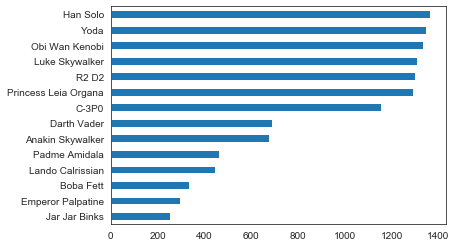

In [32]:
# Now we can easily count the most popular characters

# create dictionary to store the values
character_popularity_score={}

for s in star_wars_characters:
    character_popularity_score[s] = star_wars_characters.sum()

# Creating a dataframe with the character names and their scores
character_scores = pd.DataFrame.from_dict(character_popularity_score)

# This results in a df of character names/scores being shown repetitively. Let's just keep 1 column and rename it
character_scores.rename(columns={'Han Solo' : 'Pop. Score'}, inplace=True)
character_scores_only = character_scores.iloc[:,0].sort_values(ascending=True)

# character_scores_only
a3 = character_scores_only.plot.barh()

#### Conclusion

The character Han Solo takes the title as the most favourite character, just in front of Yoda and Obi Wan Kenobi, which make up the top three. 

The least favourite character was voted as Jar Jar Binks. 

It would be interesting to check how different age groups / genders voted for this. Maybe we will do this later on.

### 2.7 Most Controversial Character

For this, we will use the dataframe that was created prior, i.e. `controversial_character`. In general the same procedure will be followed, however, the strings will be given different numeric assignment. This was done so that we differentiate between 'Unfamiliar N/A' and 'Neither favorably nor unfavorably (neutral)' as these mean 2 completely different things. 

Therefore, all strings will be replaced by a value of 0, apart from 'neutral', which will be given a value of 1 to be used for counting.

In [33]:
# Create mapping for controversial character
controversial_rating = {
    'Very unfavorably' : 0,
    'Somewhat unfavorably' : 0,
    'Unfamiliar (N/A)' : 0,
    'Neither favorably nor unfavorably (neutral)' : 1,
    'Somewhat favorably' : 0,
    'Very favorably' : 0
}

# Make sure values in df are string
controversial_character = controversial_character.astype(str)

# Iterate through the selection and apply .map() function to the list
for a in controversial_character:
    controversial_character[a] = controversial_character[a].map(controversial_rating)

# Display dataframe
controversial_character.head()


,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


Now we can easily count the values for the most controversial character. We will follow the same procedure as previous.

In [34]:
# create dictionary to store the values
character_controversy_score={}

for b in controversial_character:
    character_controversy_score[b] = controversial_character.sum()

# Creating a dataframe with the character names and their scores
controversy_scores = pd.DataFrame.from_dict(character_controversy_score)

# This results in a df of character names/scores being shown repetitively. Let's just keep 1 column and rename it
controversy_scores.rename(columns={'Han Solo' : 'Contr. Score'}, inplace=True)

controversy_scores_only = controversy_scores.iloc[:,0].sort_values(ascending=True)

controversy_scores_only.index.name='Name'
controversy_scores_only = pd.DataFrame(data=controversy_scores_only)
controversy_scores_only

,Contr. Score
Name,
Luke Skywalker,38.0
Obi Wan Kenobi,43.0
Han Solo,44.0
Princess Leia Organa,48.0
Yoda,51.0
R2 D2,57.0
C-3P0,79.0
Darth Vader,84.0
Anakin Skywalker,135.0


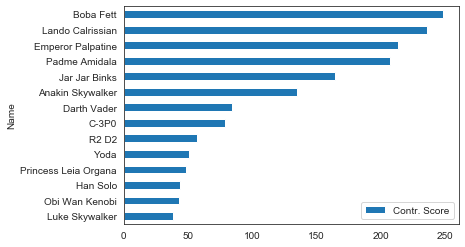

In [35]:
# Plot the controversy scores 
a3 = controversy_scores_only.plot.barh()

#### Conclusion

Boba Fett is given the award of the character which splits opinion the most. It is interesting to note that the main antagonist of the franchise, Emperor Palpatine classifies in third. As expected, characters like Han Solo, Luke Skywalker and Obi Wan Kenobi, who all did well in the most favourite question, aren't really controversial.